In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/monday.csv', sep=';', parse_dates=True)
df
df = df[:200] # just for visualization

Calculate the total number of customers in each section

In [3]:
total_per_section = df['location'].value_counts()
total_per_section

checkout    59
spices      36
dairy       36
fruit       35
drinks      34
Name: location, dtype: int64

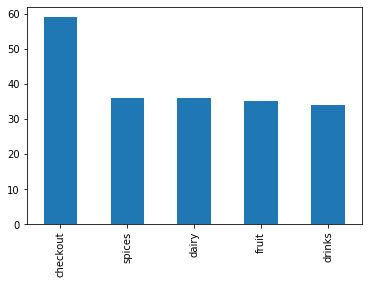

In [4]:
total_per_section.plot.bar()

Calculate the total number of customers in each section over time

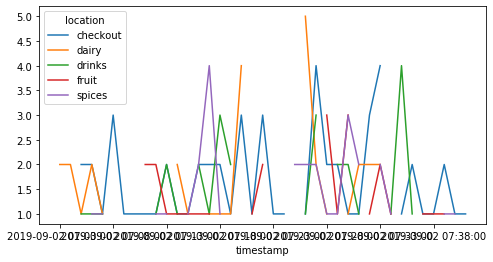

In [5]:
plt.rcParams['figure.figsize'] = (8,4)
df.groupby(['timestamp', 'location']).size().unstack().plot()

Display the number of customers at checkout over time
    

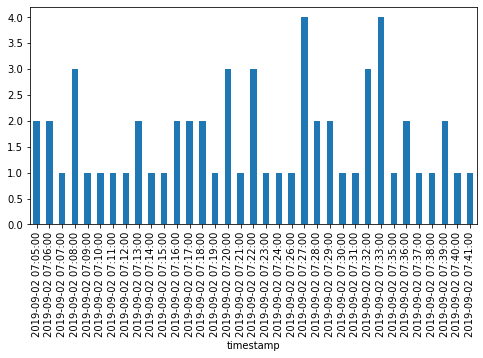

In [6]:
mask = df['location'] == 'checkout'
df.loc[mask].groupby('timestamp').size().plot.bar()

Calculate the time each customer spent in the market
    

In [7]:
def get_diff(col):
    enters = col.min()
    leaves = col.max()
    minutes = (pd.Timestamp(leaves) - pd.Timestamp(enters)) / pd.Timedelta(minutes=1)
    return minutes

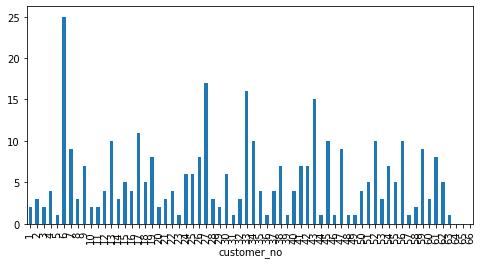

In [8]:
# Time spent by customer
df.groupby('customer_no')['timestamp'].apply(get_diff).plot.bar()

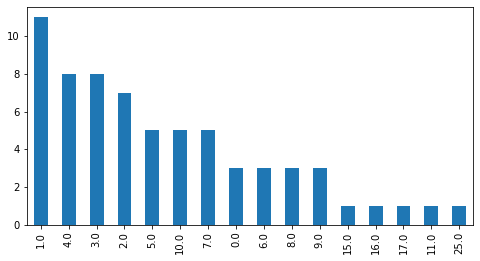

In [9]:
# How many customers per time spent
df.groupby('customer_no')['timestamp'].apply(get_diff).value_counts().plot.bar()

Calculate the total number of customers in the supermarket over time.
    

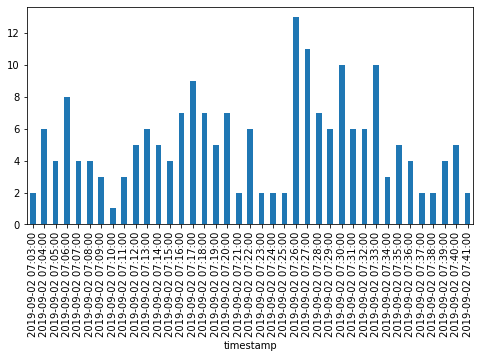

In [10]:
# By record in df
df.groupby('timestamp')['customer_no'].count().plot.bar()

/Users/mei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


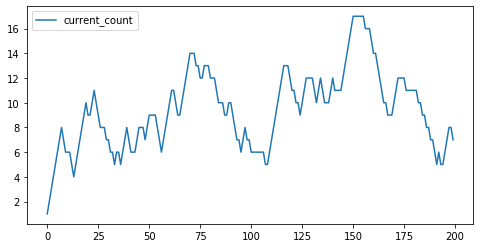

In [11]:
# Accumulated
df['is_first_section'] = df.groupby('customer_no')['timestamp'].transform(lambda x: x == np.min(x))
df['is_last_section'] = df.groupby('customer_no')['location'].transform(lambda x: x == 'checkout')
df['current_count'] = df['is_last_section'].transform(lambda x: pd.Series(range(1, len(x)+1), index=x.index))

for i in range(len(df)):
    if i == 0:
        df.iloc[i]['current_count'] = 1
    else:
        if df.iloc[i]['is_first_section'] == True:
            df.at[i, 'current_count'] = df.iloc[i-1]['current_count'] + 1
        elif df.iloc[i]['is_last_section'] == True:
            df.at[i, 'current_count'] = df.iloc[i-1]['current_count'] - 1
        else: 
            df.at[i, 'current_count'] = df.iloc[i-1]['current_count']

df[['timestamp','current_count']].plot()

In [16]:
df.head(10)

,timestamp,customer_no,location,is_first_section,is_last_section,current_count
0,2019-09-02 07:03:00,1,dairy,True,False,1
1,2019-09-02 07:03:00,2,dairy,True,False,2
2,2019-09-02 07:04:00,3,dairy,True,False,3
3,2019-09-02 07:04:00,4,dairy,True,False,4
4,2019-09-02 07:04:00,5,spices,True,False,5
5,2019-09-02 07:04:00,6,spices,True,False,6
6,2019-09-02 07:04:00,7,spices,True,False,7
7,2019-09-02 07:04:00,8,fruit,True,False,8
8,2019-09-02 07:05:00,1,checkout,False,True,7
9,2019-09-02 07:05:00,5,checkout,False,True,6


Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

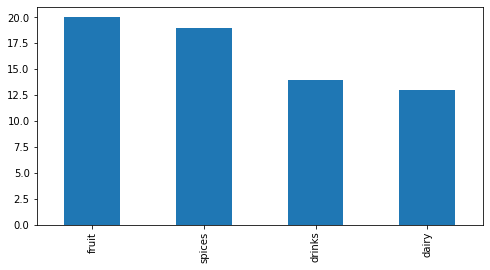

In [17]:
df.loc[df['is_first_section'] == True, 'location'].value_counts().plot.bar()

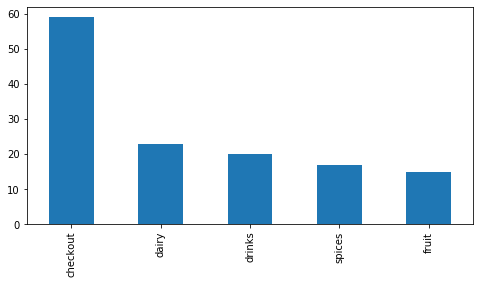

In [18]:
df.loc[df['is_first_section'] == False, 'location'].value_counts().plot.bar()

Estimate the total revenue for a customer using the following table:

    section | revenue per minute
    fruit   | 4€
    spices  | 3€
    dairy   | 5€
    drinks  | 6€

Which is the most profitable section according to your data?